# Season Reading Dataset

## (1) Using KNN 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pwd

'C:\\Users\\CHANDRU'

In [3]:
train = pd.read_csv(r'C:/Users/CHANDRU/Desktop/DS/sensor_readings_24.csv')

In [4]:
train.head()

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
0,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
2,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
3,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
4,0.439,0.498,3.626,3.629,5.0,2.918,5.0,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn


In [5]:
train.tail()

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
5450,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.0,5.0,1.562,Move-Forward
5451,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.0,5.0,1.085,Sharp-Right-Turn
5452,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.0,5.0,1.105,Sharp-Right-Turn
5453,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.0,5.0,1.118,Move-Forward
5454,0.950,4.066,5.000,2.819,2.798,2.570,2.422,1.016,1.739,0.964,...,0.635,0.618,0.628,0.776,5.000,1.083,5.0,5.0,1.168,Sharp-Right-Turn


In [6]:
train.describe()

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,...,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5455.000000,5455.00000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,1.471807,2.327378,2.489139,2.796346,2.958178,2.893068,3.350811,2.540431,3.125767,2.832421,...,2.205857,1.202223,0.989921,0.91035,1.058212,1.076436,1.016030,1.778279,1.555250,1.578719
std,0.802753,1.410058,1.247454,1.309438,1.339062,1.282693,1.413645,1.111653,1.357047,1.307960,...,1.715580,1.098638,0.942138,0.88959,1.144711,1.141570,0.887485,1.571726,1.291478,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.35400,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538500,1.731000,1.774000,1.785500,1.930500,1.618000,1.799500,1.636000,...,0.860000,0.690500,0.581000,0.53000,0.523500,0.542000,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.905000,2.064000,2.457000,2.667000,2.682000,3.225000,2.171000,2.802000,2.679000,...,1.328000,0.803000,0.738000,0.68500,0.691000,0.693000,0.764000,1.031000,1.071000,1.289000
75%,1.814000,2.683000,2.739000,4.094000,4.314000,3.835500,5.000000,3.193000,5.000000,3.526500,...,4.436500,1.159000,0.913000,0.83700,0.857000,0.863000,1.002500,2.068500,1.560000,1.657500
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
train.isnull().sum()

0.438                0
0.498                0
3.625                0
3.645                0
5.000                0
2.918                0
5.000.1              0
2.351                0
2.332                0
2.643                0
1.698                0
1.687                0
1.698.1              0
1.717                0
1.744                0
0.593                0
0.502                0
0.493                0
0.504                0
0.445                0
0.431                0
0.444                0
0.440                0
0.429                0
Slight-Right-Turn    0
dtype: int64

In [8]:
train['Slight-Right-Turn'].value_counts(dropna=False)

Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     825
Slight-Left-Turn      328
Name: Slight-Right-Turn, dtype: int64

In [9]:
train.shape

(5455, 25)

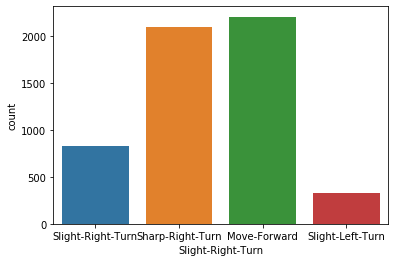

In [10]:
sns.countplot(x='Slight-Right-Turn', data=train)

In [11]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [12]:
print(x.shape)
print(y.shape)

(5455, 24)
(5455,)


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[3 3 3 ... 1 0 1]


In [14]:
set(y)

{0, 1, 2, 3}

In [15]:
from sklearn.model_selection import train_test_split
x_1, x_test, y_1, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x_1 , y_1, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)

(3491, 24)
(3491,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_trainS = sc_X.fit_transform(x_train)
x_1S = sc_X.fit_transform(x_1)
x_cvS = sc_X.fit_transform(x_cv)
x_testS  = sc_X.fit_transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8725939505041247


In [19]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
print(classification_report(y_test, y_pred) )

Confusion Matrix : 
 [[392  27   5  23]
 [ 38 376   3  10]
 [  6   1  53   0]
 [ 19   7   0 131]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       447
           1       0.91      0.88      0.90       427
           2       0.87      0.88      0.88        60
           3       0.80      0.83      0.82       157

    accuracy                           0.87      1091
   macro avg       0.86      0.87      0.86      1091
weighted avg       0.87      0.87      0.87      1091



## Using Decision tree 

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depthVal = [2,4,6,8,10,12,14,16,18,20]
Acc = []
for d in depthVal:
  clf = DecisionTreeClassifier(criterion = 'entropy',  max_depth=d )
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_cv)
  Acc.append(accuracy_score(y_pred,y_cv))

print(Acc)

[0.8201603665521191, 0.9232531500572738, 0.9919816723940436, 0.997709049255441, 0.9965635738831615, 0.997709049255441, 0.9965635738831615, 0.9965635738831615, 0.9965635738831615, 0.997709049255441]


In [21]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=8)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
model = (accuracy_score(y_pred,y_test))
print(model)

0.995417048579285


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[444   1   1   0]
 [  0 426   0   0]
 [  0   0  59   0]
 [  3   0   0 157]]


[Text(97.65, 205.35999999999999, 'X[14] <= 0.9\nentropy = 1.714\nsamples = 3491\nvalue = [1403, 1349, 207, 532]'),
 Text(83.7, 181.2, 'entropy = 0.0\nsamples = 1040\nvalue = [0, 1040, 0, 0]'),
 Text(111.60000000000001, 181.2, 'X[18] <= 0.505\nentropy = 1.617\nsamples = 2451\nvalue = [1403, 309, 207, 532]'),
 Text(27.900000000000002, 157.04, 'X[11] <= 1.184\nentropy = 0.738\nsamples = 531\nvalue = [11, 77, 0, 443]'),
 Text(13.950000000000001, 132.88, 'entropy = 0.0\nsamples = 70\nvalue = [0, 70, 0, 0]'),
 Text(41.85, 132.88, 'X[13] <= 1.085\nentropy = 0.276\nsamples = 461\nvalue = [11, 7, 0, 443]'),
 Text(27.900000000000002, 108.72, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(55.800000000000004, 108.72, 'X[18] <= 0.495\nentropy = 0.165\nsamples = 454\nvalue = [11, 0, 0, 443]'),
 Text(41.85, 84.56, 'entropy = 0.0\nsamples = 414\nvalue = [0, 0, 0, 414]'),
 Text(69.75, 84.56, 'X[19] <= 0.494\nentropy = 0.849\nsamples = 40\nvalue = [11, 0, 0, 29]'),
 Text(55.800000000000004, 

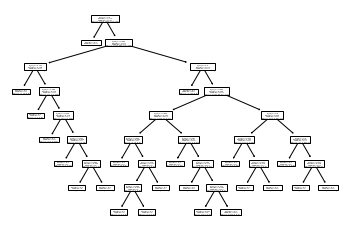

In [23]:
from sklearn import tree
tree.plot_tree(clf.fit(x_train, y_train)) 

In [24]:
print(model)

0.995417048579285
